In [66]:
import pandas as pd
import json
import numpy as np

In [67]:
radar_df = pd.read_csv("../data/processed data/radar_data_7.csv")
radar_df = radar_df[radar_df["QPDH0"] < 0.5]
lidar_df = pd.read_csv("../data/processed data/lidar_data_1.csv")
# radar_df = radar_df[radar_df["QPDH0"] < 0.5]

In [68]:
def change_withdelay(delta_t=0.06):
    with open(f"../data/raw data/radar_positions.json", "r") as file:
        radar_positions = {float(k): v for k, v in json.load(file).items()}

    for i, cords in radar_positions.items():
        for j, ax in enumerate(("X, (m)", "Y, (m)")):
            radar_df.loc[radar_df["radar_idx"] == i, ax] -= cords[j]

    vector_length = (radar_df["X, (m)"] ** 2 + radar_df["Y, (m)"] ** 2) ** 0.5
    radar_df["RadialDelta"] = (
        delta_t - radar_df["(radar_point_ts - lidar_ts), (s)"]
    ) * radar_df["AbsoluteRadialVelocity"]
    radar_df["XwithDelta"] = (
        radar_df["X, (m)"] * (vector_length + radar_df["RadialDelta"]) / vector_length
    )
    radar_df["YwithDelta"] = (
        radar_df["Y, (m)"] * (vector_length + radar_df["RadialDelta"]) / vector_length
    )

    for i, cords in radar_positions.items():
        for j, ax in enumerate(("XwithDelta", "YwithDelta")):
            radar_df.loc[radar_df["radar_idx"] == i, ax] += cords[j]

    for i, cords in radar_positions.items():
        for j, ax in enumerate(("X, (m)", "Y, (m)")):
            radar_df.loc[radar_df["radar_idx"] == i, ax] += cords[j]

    return radar_df

In [69]:
def asdasd(x):
    return (0, 1 - 1.1 ** (-abs(x)), 0, 1)

X, (m)
Y, (m)
Z, (m)
AbsoluteRadialVelocity
RadarCrossSection
RelativeRadialVelocity
RelativeLateralVelocity
Range
DistanceAccuracy
AngleAccuracy
DynProp
HasQuality
QPDH0
QDistLongRMS
QDistLatRMS
QVLongRMS
QVLatRMS
QAmbigState
QInvalidState
(radar_point_ts - lidar_ts), (s)
radar_idx
X_RAW, (m)
Y_RAW, (m)
RadialDelta
XwithDelta
YwithDelta
[(0, 0.009574365976230625, 0, 1), (0, 0.011214694914371881, 0, 1), (0, 0.03261508529614854, 0, 1), (0, 0.9209210451581257, 0, 1), (0, 0.013410966670835744, 0, 1), (0, 0.049948144432462094, 0, 1), (0, 0.027882214323274757, 0, 1), (0, 0.0038336680997378414, 0, 1), (0, 0.9968130183232038, 0, 1), (0, 0.015968072892684315, 0, 1), (0, 0.017406166217074692, 0, 1), (0, 0.0008326137785423793, 0, 1), (0, 0.017661924611232616, 0, 1), (0, 0.003490800400412719, 0, 1), (0, 0.022307175143694402, 0, 1), (0, 0.9543343107871751, 0, 1), (0, 0.941499835026819, 0, 1), (0, 0.012225457212881152, 0, 1), (0, 0.945501389562727, 0, 1), (0, 0.009598672322621016, 0, 1), (0, 0.0140

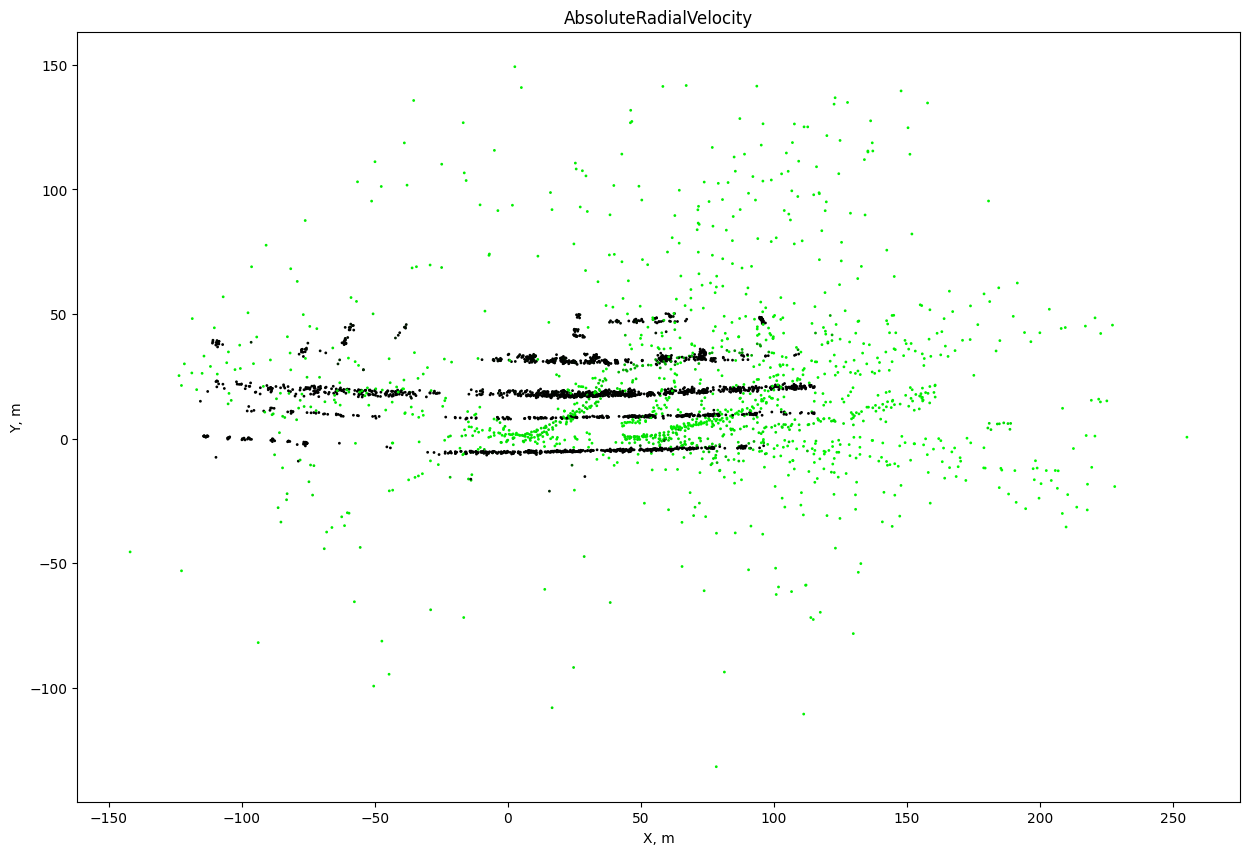

In [70]:
import matplotlib.pyplot as plt

change_withdelay()
plt.figure(figsize=(15, 10))

a = radar_df[(radar_df["QPDH0"] < 0.75)]["AbsoluteRadialVelocity"]


def sigmoid(a):
    return 1 / (1 + 1.5**a)


for item in radar_df:
    print(item)


k = []
for item in a:
    k.append(asdasd(item))

print(k)
plt.scatter(
    radar_df[
        (radar_df["QPDH0"] < 0.75)
        # & (abs(radar_df["XwithDelta"] - 50) < 20)
        # & (abs(radar_df["YwithDelta"]) < 15)
    ]["XwithDelta"],
    radar_df[
        (radar_df["QPDH0"] < 0.75)
        # & (abs(radar_df["XwithDelta"] - 50) < 20)
        # & (abs(radar_df["YwithDelta"]) < 15)
    ]["YwithDelta"],
    s=1,
    c=k,
    # alpha=0.5,
    label="radar",
)
plt.xlabel('X, m')
plt.ylabel('Y, m')
plt.title('AbsoluteRadialVelocity')
# print(sigmoid(a))
plt.show()
# plt.grid()

# (1, sigmoid(a)*0.9999, sigmoid(a)*0.9999, 1)

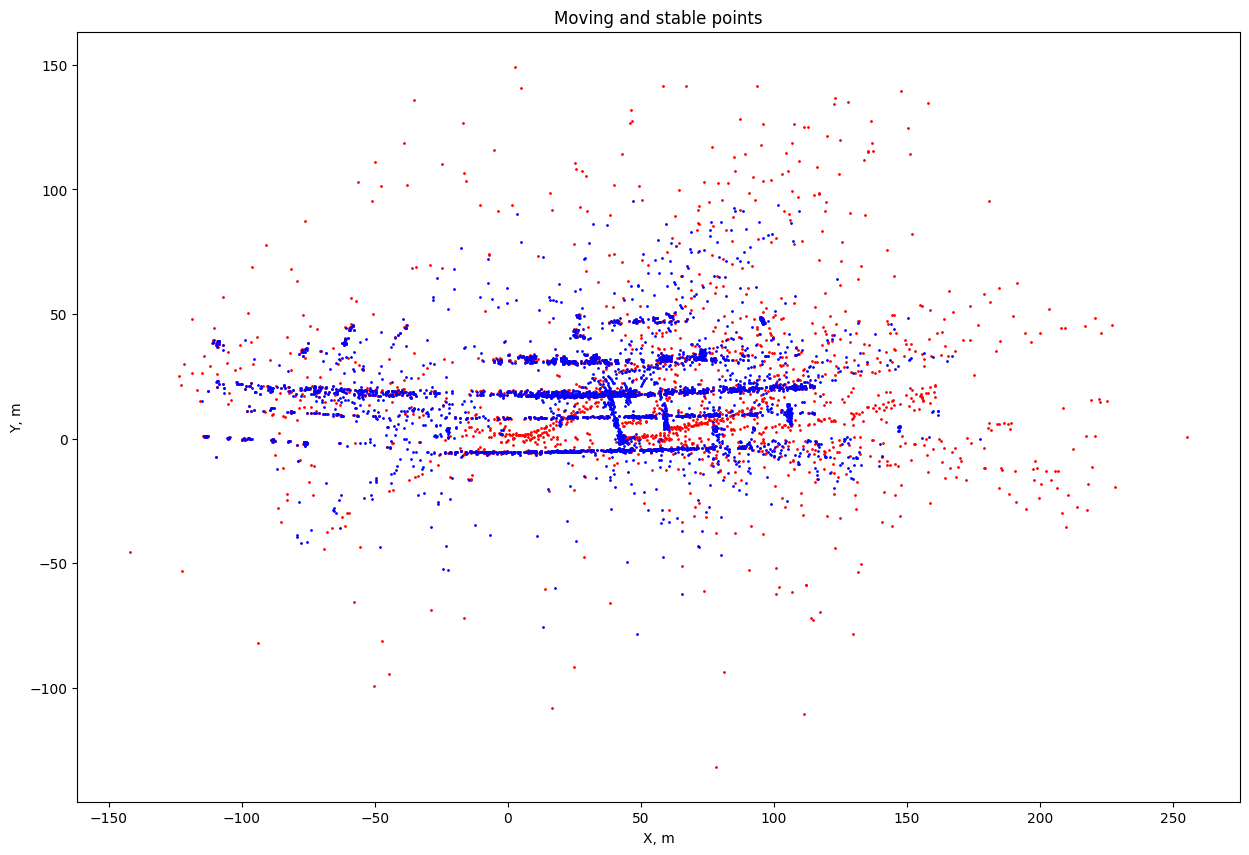

In [71]:
plt.figure(figsize=(15, 10))

plt.scatter(
    radar_df[
        (radar_df["QPDH0"] < 0.75)
        # & (abs(radar_df["XwithDelta"] - 50) < 20)
        # & (abs(radar_df["YwithDelta"]) < 15)
    ]["XwithDelta"],
    radar_df[
        (radar_df["QPDH0"] < 0.75)
        # & (abs(radar_df["XwithDelta"] - 50) < 20)
        # & (abs(radar_df["YwithDelta"]) < 15)
    ]["YwithDelta"],
    s=1,
    c="red",
    # alpha=0.5,
    label="radar",
)

plt.scatter(
    radar_df[
        (radar_df["QPDH0"] < 0.75)
        # & (abs(radar_df["XwithDelta"] - 50) < 20)
        # & (abs(radar_df["YwithDelta"]) < 15)
    ]["X, (m)"],
    radar_df[
        (radar_df["QPDH0"] < 0.75)
        # & (abs(radar_df["XwithDelta"] - 50) < 20)
        # & (abs(radar_df["YwithDelta"]) < 15)
    ]["Y, (m)"],
    s=1,
    c="blue",
    # alpha=0.5,
    label="radar",
)
plt.xlabel('X, m')
plt.ylabel('Y, m')
plt.title('Moving and stable points')
plt.show()

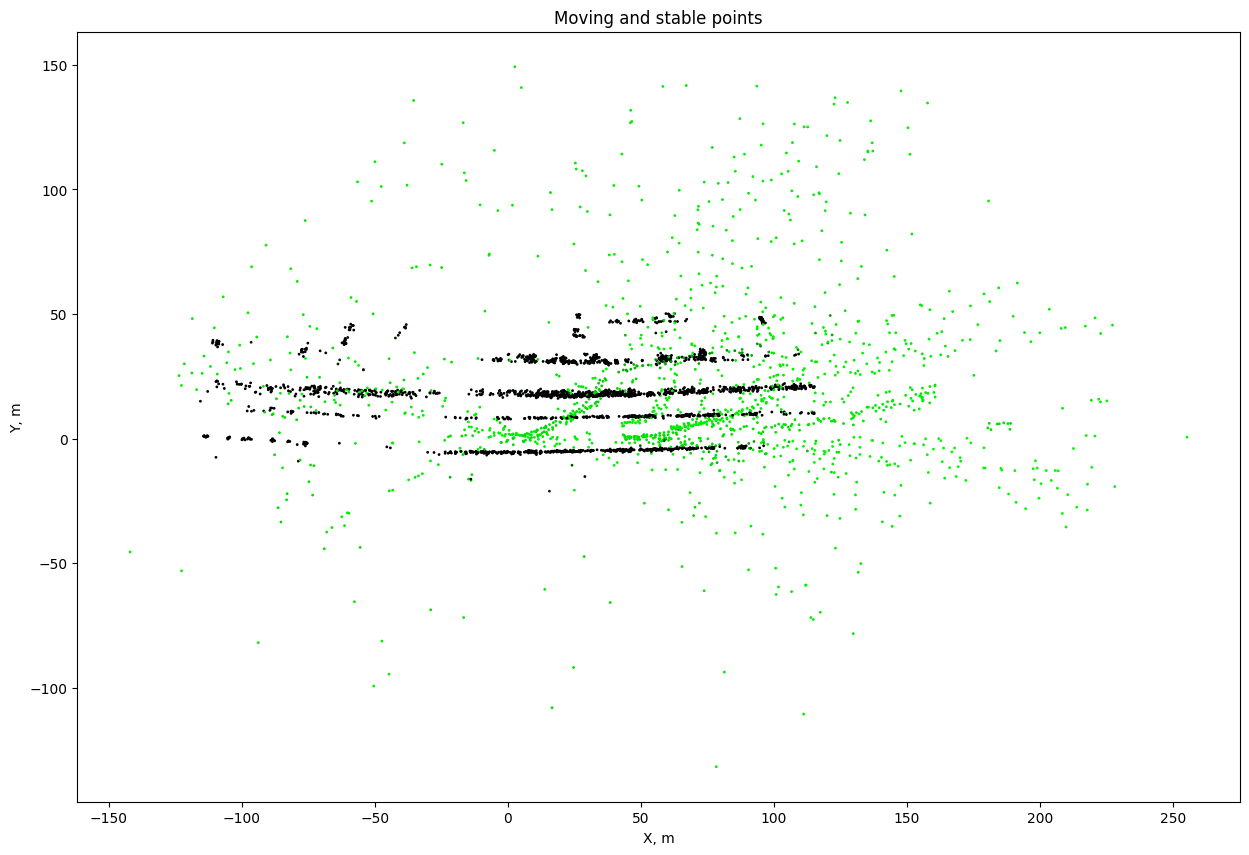

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

change_withdelay()

radar_df["alpha"] = np.arctan(1 / radar_df["XwithDelta"] * radar_df["YwithDelta"])

t = np.mean(np.mean(radar_df["AbsoluteRadialVelocity"] / np.cos(radar_df["alpha"])))
radar_df["sped))"] = radar_df["AbsoluteRadialVelocity"] - t * np.cos(radar_df["alpha"])

# k = []
# for item in radar_df["sped))"]:
#     k.append((1 - sigmoid(item)*0.9999, 0, 0, 1))
plt.xlabel('X, m')
plt.ylabel('Y, m')
plt.title('Moving and stable points')
plt.scatter(
    radar_df[
        (radar_df["QPDH0"] < 0.75)
        # & (abs(radar_df["XwithDelta"] - 50) < 20)
        # & (abs(radar_df["YwithDelta"]) < 15)
    ]["XwithDelta"],
    radar_df[
        (radar_df["QPDH0"] < 0.75)
        # & (abs(radar_df["XwithDelta"] - 50) < 20)
        # & (abs(radar_df["YwithDelta"]) < 15)
    ]["YwithDelta"],
    s=1,
    c=k,
    # alpha=0.5,
    label="radar",
)